## **Word2Vec**

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
path ="/content/drive/MyDrive/train.csv"

In [ ]:
df= pd.read_csv(path)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.shape

(404290, 6)

To turn the column "question1" into a list of lists,  we will use the GenSim package's function "simple preprocess" to convert each row into a collection of tokens, such as "what is your age" -> "what," "is," "your," "age."

In [ ]:
import gensim

In [ ]:
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"question1"))
    if row["is_duplicate"] == 0:
        documents.append(read_questions(row,"question2"))

In [ ]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


Word2Vec will now retrieve all unique terms from all "documents" sub-lists, building the vocabulary (individual words).

In [ ]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(documents)  # prepare the model vocabulary

We have defined five parameters that we utilized to construct a Word2Vec model above:

> **Size**: The size of word vectors refers to their dimensionality. It specifies how many tokens are utilized to represent each word. Rule-of-thumb: If a dataset is tiny, so should its size be. If a dataset is enormous, the size should be significant as well. It's a matter of fine-tuning.

> **Window**: The most significant possible distance between the target word and its surrounding word. Take, for example, the four-word sentence "panda is an animal" (suppose that we do not exclude the stop words). If the window size is 2, the terms "is" and "an" have a direct effect on the vector of the word "panda." As a general rule, a narrower window should display more closely linked terms (of course, the exclusion of stop words should be considered).

> **Min** **count**: Ignores any words whose overall frequency is less than this value. For example, if the word frequency is shallow, this term may be deemed insignificant.

> **Sg**: Chooses the training algorithm: 1 for Skip-Gram and 0 for CBOW (Continuous Bag of Words).

> **Workers**: The number of worker threads utilized to train the model.

In [ ]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(25465884, 35144510)

We completed the training of our Word2Vec model. Next, we drop the softmax layer and use the 47366 x 150 weight matrix as our word embedding lookup table. The only aim was to obtain the hidden layer's weights. These weights are the word embeddings that we had to learn. We no longer require the entire Word2Vec network once we know these word embeddings.


### **Examining the trained Word2Vec model**

In [ ]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

what
is
the
step
by
guide
to
invest
in
share


In [ ]:
len(word_vectors.vocab)

47336

In [ ]:
vector = model.wv["immigration"]  # numpy vector of a word
len(vector)

150

In [ ]:
vector

array([-4.52022433e-01,  3.16222519e-01,  1.53702825e-01, -1.44746810e-01,
        1.17065787e-01, -1.52048424e-01,  3.12471747e-01,  9.25444290e-02,
        9.89916921e-02,  7.75572658e-01, -1.60548031e-01, -5.51113039e-02,
        3.51541847e-01, -1.16076127e-01, -5.02400696e-01,  1.43737253e-02,
        1.84996780e-02,  3.06932747e-01, -7.78194442e-02,  3.17026265e-02,
        6.77375257e-01, -4.09299210e-02,  5.86595178e-01,  2.45095253e-01,
       -1.75730884e-01, -3.15176994e-01,  5.62177002e-02,  2.71416128e-01,
        4.06637251e-01,  1.00435935e-01,  3.50527436e-01, -5.57179213e-01,
        1.40575498e-01,  1.02940053e-02,  6.92531705e-01, -4.02675837e-01,
        1.92075700e-01,  6.28755569e-01,  2.37363979e-01,  1.91789538e-01,
        4.27467793e-01, -1.87981963e-01,  1.63399771e-01,  3.81378412e-01,
        5.33751786e-01, -5.61742663e-01, -4.07187454e-02,  6.15779996e-01,
       -1.10355462e-03,  3.26533467e-01, -7.54533485e-02, -2.67795235e-01,
       -2.28524044e-01, -

Using t-SNE, we can now generate a two-dimensional semantic representation of word embeddings.

In [ ]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'about': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f8a90>,
 'active': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f8c50>,
 'am': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f8210>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7f0cc14fad10>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f8650>,
 'are': <gensim.models.keyedvectors.Vocab at 0x7f0cc14fa210>,
 'astrology': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f8850>,
 'back': <gensim.models.keyedvectors.Vocab at 0x7f0ce9a11d10>,
 'be': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f80d0>,
 'buy': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f8b50>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f0ce9a11090>,
 'can': <gensim.models.keyedvectors.Vocab at 0x7f0ce9a11510>,
 'canada': <gensim.models.keyedvectors.Vocab at 0x7f0cc14faa90>,
 'cap': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f8910>,
 'capricorn': <gensim.models.keyedvectors.Vocab at 0x7f0cc14f8890>,
 'carbon': <gensim.models.keyedvectors.Vocab at 0x7f0

In [ ]:
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


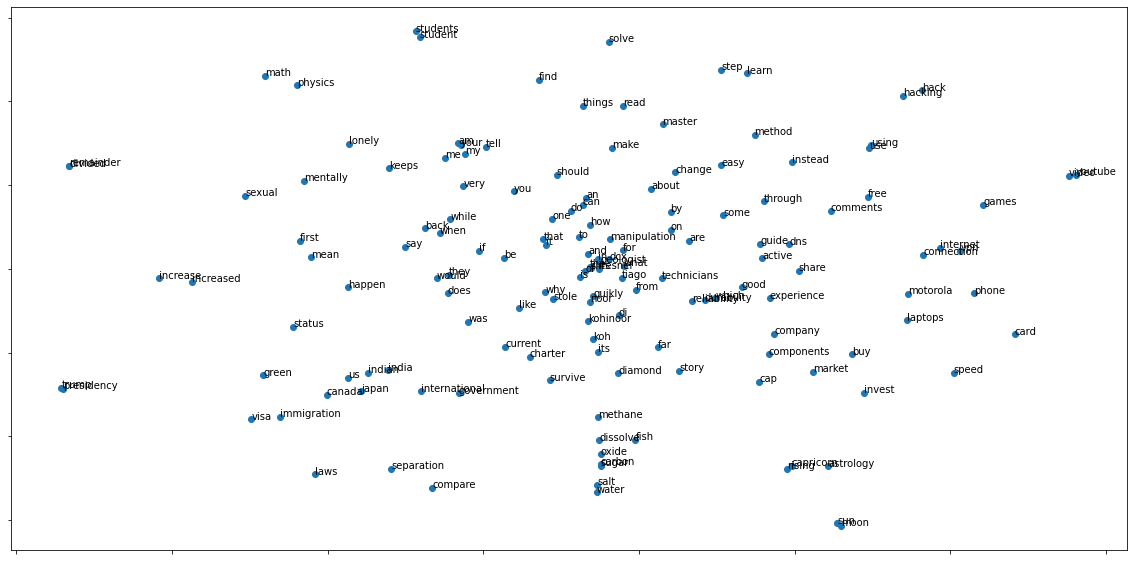

In [ ]:
#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

We can see that the words "salt", "water", "methane", "dissolve" etc., are close to each other. This means that the words occured in the same context in the corpus.